# Regresión con Scikit-learn

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />

[Scikit-learn](https://scikit-learn.org/stable/) es una biblioteca para aprendizaje de máquina de software libre para el lenguaje de programación Python.1​ Incluye varios algoritmos de clasificación, regresión y análisis de grupos entre los cuales están máquinas de vectores de soporte, bosques aleatorios, Gradient boosting, K-means y DBSCAN. Está diseñada para interoperar con las bibliotecas numéricas y científicas NumPy y SciPy

In [3]:
import numpy as np
import pandas as pd
import sklearn

from sklearn import datasets

diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
# Creamos un dataframe a partir del dataset cargado desde scikit-learn

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["avance"]=diabetes.target

print("Tamaño del dataset: ", len(diabetes_df))
diabetes_df.head()

Tamaño del dataset:  442


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,avance
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


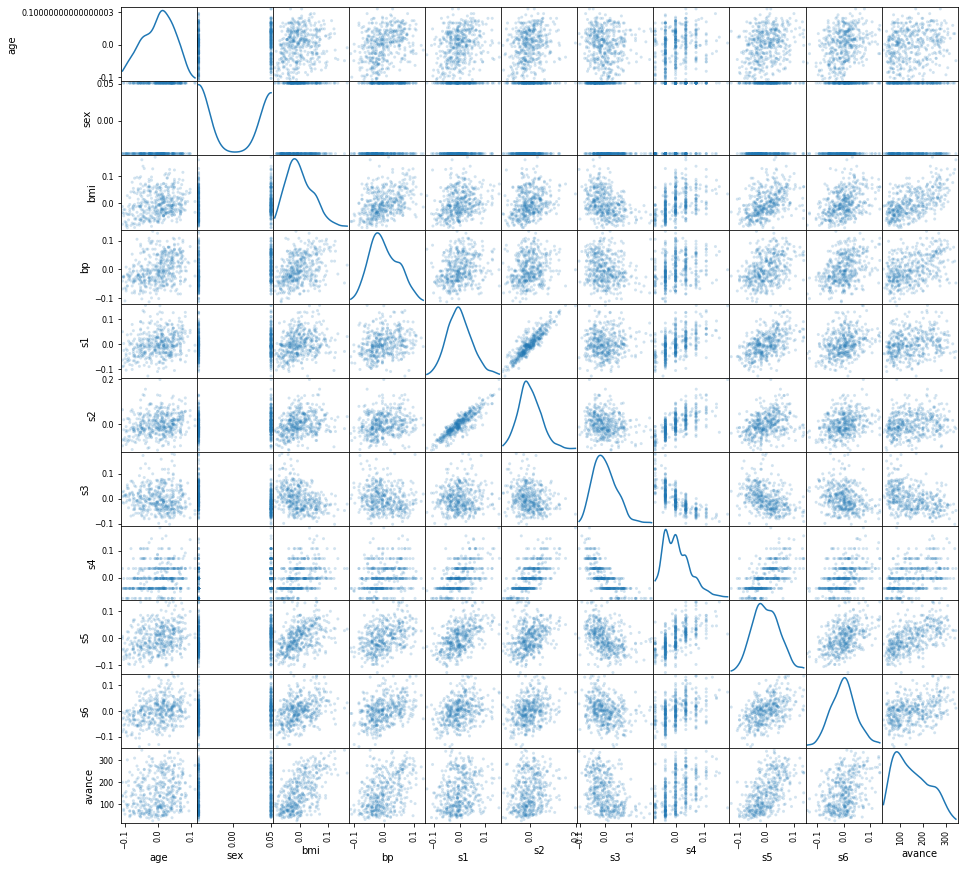

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

plot=scatter_matrix(diabetes_df, alpha=0.2, figsize=[15, 15], marker=".", diagonal='kde')

Train 75%

Validation 15%

Test 10%

In [55]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(diabetes_df, test_size=0.3)

print("Tamaño del train set: ", len(df_train))
print("Tamaño del test set: ", len(df_test))

Tamaño del train set:  309
Tamaño del test set:  133


# 2. Regresión lineal

$$ \text{min}_{\mathbf{w}, b} \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2 $$

## 2.1 Caso simple (1 feature)

Partiremos consturyendo un modelo lineal usando el campo bmi, el cual corresponde a la columna numero 2

Usaremos la función LinearRegression que permite crear un modelo lineal usando la regresión de mínimos cuadrados.

In [56]:
#df_train.iloc[:,2]

In [57]:
#df_train.iloc[:,10]

In [58]:
X_train=np.array(df_train.iloc[:,2])[np.newaxis].T
y_train=np.array(df_train.iloc[:,10])

X_test=np.array(df_test.iloc[:,2])[np.newaxis].T
y_test=np.array(df_test.iloc[:,10])

In [59]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

print("R^2 en entrenamiento: %f" % regr.score(X_train, y_train))
print("R^2 en test: %f" % regr.score(X_test, y_test))

R^2 en entrenamiento: 0.368894
R^2 en test: 0.258225


In [60]:
print(regr.coef_)

[977.1359949]


In [61]:
y_pred = regr.predict(X_test)
print(y_pred)

[ 97.12939406 212.97798111 159.26636348 248.78572619 110.82059071
 150.84101169 108.71425277 137.14981504  92.91671817 158.2131945
 146.6283358  139.25615299 156.10685656 170.85122218 158.2131945
 116.08643558 119.2459425  104.50157688 159.26636348  86.59770433
 138.20298402 197.18044651  88.70404228 130.8308012  160.31953245
  95.02305612  83.43819741 107.66108379 129.77763223 112.92692866
 135.0434771  200.33995343 115.03326661 177.17023602  82.38502844
 123.45861839 187.70192575 256.15790901 226.66917776 144.52199785
 133.99030812  99.23573201 165.58537732  96.07622509  73.95967665
 112.92692866 124.51178736 172.95756013 221.40333289 121.35228045
  90.81038022 107.66108379  75.01284563 141.36249093 133.99030812
 162.4258704  274.06178155 129.77763223 202.44629138 112.92692866
 167.69171526 115.03326661 124.51178736 216.13748803 142.41565991
  97.12939406 155.05368759 128.72446326  85.54453536 171.90439116
 133.99030812 212.97798111 129.77763223 159.26636348 220.35016392
 155.0536875

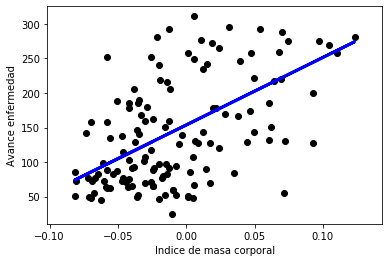

In [62]:
# Usaremos el campo bmi para graficar el ajuste lineal

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Indice de masa corporal')
plt.ylabel('Avance enfermedad')

plt.show()

## 2.2 Análisis usando librería Statsmodels

[Statsmodels](https://www.statsmodels.org) es una librería nos brinda un gran número de herramientas para explorar datos, estimar modelos estadísticos, realizar pruebas estadísticas y muchas cosas más.

In [70]:
import statsmodels.api as sm

En Stasmodels necesitamos llevar la variable X_train a un formato de N_observaciones x N_features

In [81]:
y_train_sm = y_train
X_train_sm = sm.add_constant(X_train)

y_test_sm = y_test
X_test_sm = sm.add_constant(X_test)

In [83]:
olsmod = sm.OLS(y_train_sm, X_train_sm)

olsres = olsmod.fit()

print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           1.54e-32
Time:                        10:23:03   Log-Likelihood:                -1709.1
No. Observations:                 309   AIC:                             3422.
Df Residuals:                     307   BIC:                             3430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7456      3.496     43.971      0.0

In [84]:
y_pred = olsres.predict(X_test_sm)
print(y_pred[0:10])

[ 97.12939406 212.97798111 159.26636348 248.78572619 110.82059071
 150.84101169 108.71425277 137.14981504  92.91671817 158.2131945 ]


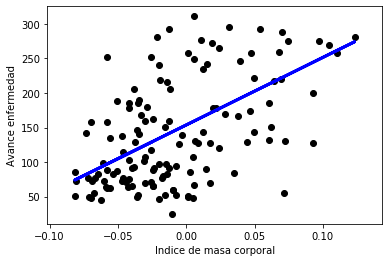

In [85]:
# Usaremos el campo bmi para graficar el ajuste lineal

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Indice de masa corporal')
plt.ylabel('Avance enfermedad')

plt.show()

## 2.3 Caso multivariado (Todos los features)

Usaremos todos los features para generar un modelo lineal

In [20]:
X_train=np.array(df_train.iloc[:,0:10])
y_train=np.array(df_train.iloc[:,10])

X_test=np.array(df_test.iloc[:,0:10])
y_test=np.array(df_test.iloc[:,10])

In [21]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

print("R^2 en entrenamiento: %f" % regr.score(X_train, y_train))
print("R^2 en test: %f" % regr.score(X_test, y_test))

R^2 en entrenamiento: 0.533436
R^2 en test: 0.466696


In [22]:
print(regr.coef_)

[ -93.01068643 -231.23258916  566.49719596  327.8352985  -602.16777252
  312.4788253    79.00206146  244.38465933  665.65601894   89.69476586]


## 2.4 Construcción de curva de aprendizaje

Scikit-learn permite calcular la curva de aprendizaje usando la función learning_curve. Es una herramienta que permite determinar cuanto ganamos al agregar mas datos al set de entrenamiento y determinar si el estimador sufre de un error de varianza o un erro de bias.

In [24]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="puntuaciones de entrenamiento " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="puntuaciones de test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)


/Users/rmunoz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


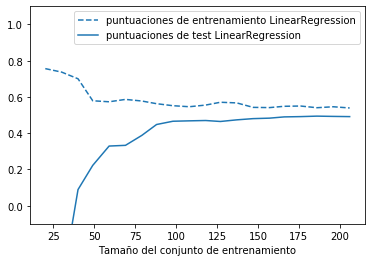

In [25]:
X=np.array(diabetes_df.iloc[:,0:10])
y=np.array(diabetes_df.iloc[:,10])

plt.figure()
plot_learning_curve(LinearRegression(), X_train, y_train)

# 3. Regresión de cresta (*Ridge Regression*, penalización L2)

**El estimador de cresta (``Ridge``)** es una regularización simple (llamada regularización L2) para el modelo LinearRegression. En particular, tiene el beneficio de no ser más costoso computacionalmente que la estimación basada en mínimos cuadrados.

$$ \text{min}_{\mathbf{w},b}  \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_2^2$$ 

In [33]:
x=range(10)
for i in x:
    print(i)

0
1
2
3
4
5
6
7
8
9


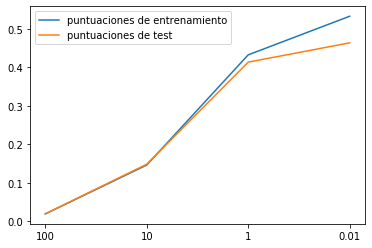

In [27]:
from sklearn.linear_model import Ridge

ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="puntuaciones de entrenamiento")
plt.plot(test_scores, label="puntuaciones de test")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

La cantidad de regularización se ajusta a través del parámetro `alpha` del modelo Ridge.

/Users/rmunoz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rmunoz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


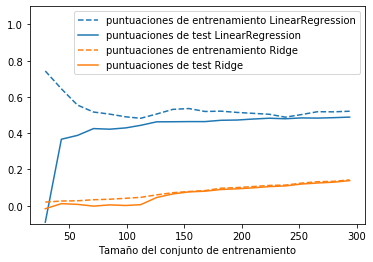

In [28]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

In [ ]:
alphas = np.logspace(-4, -1, 6)
print("Alphas: ", alphas)

ridge = Ridge(alpha=.1)
scores = [ridge.set_params(alpha=alpha).fit(X_train, y_train,).score(X_test, y_test) for alpha in alphas]
print("Score: ", scores) 

best_alpha = alphas[scores.index(max(scores))]
print("Best alpha: ", best_alpha)

# 4. Lasso (penalización L1)
**El estimador ``Lasso``** es útil para conseguir imponer dispersión en los coeficientes. En otras palabras, se debería preferir esta penalización si creemos que muchas de las características no son relevantes. Se consigue a través de la regularización L1.

$$ \text{min}_{\mathbf{w}, b} \sum_i \frac{1}{2} || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_1$$ 

Del primer gráfico podemos ver que el campo sex no aporta mucha información en la predicción de la variable avance de enfermedad.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
scores = [lasso.set_params(alpha=alpha).fit(X_train, y_train).score(X_test, y_test) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]

print("Best alpha: ", best_alpha)

lasso.alpha = best_alpha
lasso.fit(X_train, y_train)

In [ ]:
print(lasso.coef_)